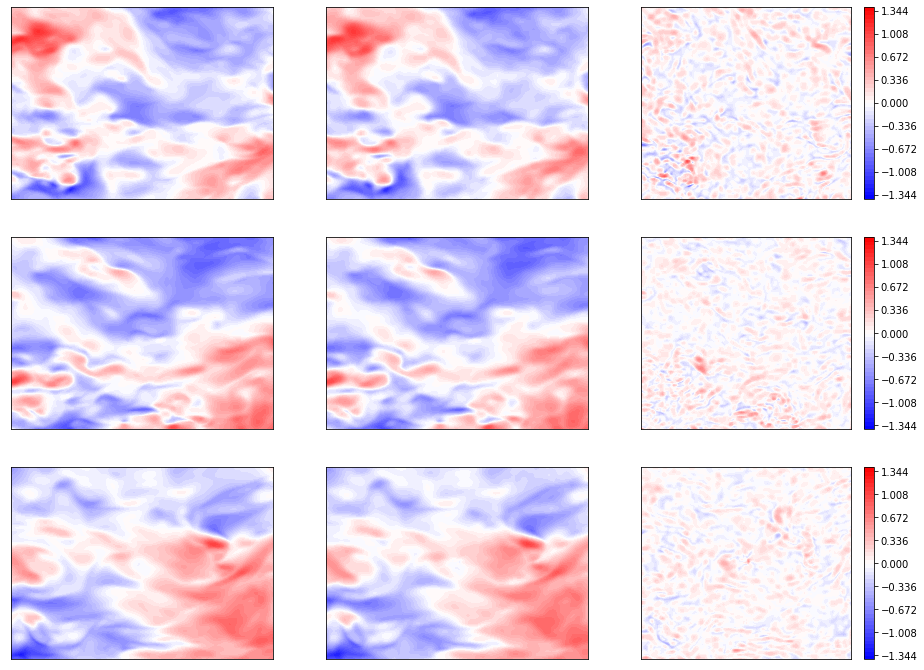

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import sys
import h5py
import matplotlib.ticker as ticker

## read data

PATH='./run/HIT_NIF_SIREN_NSNAP_20_NSX_200_OMEGA_30.0_LSX_4_NST_50_LST_1_NP_3_BS_1600'

data_pred = h5py.File(PATH+'/pred.h5','r')

data_true = h5py.File(PATH+'/true.h5','r')


y = data_pred['ycoor']
z = data_pred['zcoor']
yy,zz=np.meshgrid(y,z)

ix_list = [0,32,64]
ic = 0

fig,axs=plt.subplots(len(ix_list),3,figsize=(16,4*len(ix_list)))
# fig,axs=plt.subplots(len(ix_list),3,figsize=(16,16))

levels = np.linspace(-1.4,1.4,51,endpoint=True)
# size =0.5

for i in range(len(ix_list)):
    ix = ix_list[i]
    
    true = data_true['Velocity_0001'][ix,:,:,ic]
    pred = data_pred['Velocity_0001'][ix,:,:,ic]
    err = true - pred

    im = axs[i,0].contourf(yy,zz,true,levels=levels,cmap='bwr')
    
    ## pred
    im = axs[i,1].contourf(yy,zz,pred,levels=levels,cmap='bwr')
    
    ## loss
    im = axs[i, 2].contourf(yy,zz,err*5,levels=levels,cmap='bwr')
    plt.colorbar(im,ax=axs[i,2])    
    
    for k in range(3):
        axs[i,k].set_xticks([])
        axs[i,k].set_yticks([])
        axs[i,k].set_xlim([yy.min(),yy.max()])
        axs[i,k].set_ylim([zz.min(),zz.max()])

# plt.tight_layout()
plt.savefig('./pngs/compare_U_pred_true.png')

